# Plot Gaussian Beam using beam parameters #
This is a demonstration file for the course PH455/957. The script calculates the properties of a Gaussian beam and plots it.

In [49]:
import numpy as np                     # numpy arrays
import matplotlib.pyplot as plt        # plotting
import matplotlib.cm as cm             # colormaps

Write functions to calculate beam parameters

In [51]:
# calculate the waist W(z) of the beam
def W(z):
    return W0*np.sqrt(1+ (z/z0)**2 )

# calculate zeta(z)
def zeta(z):
    return np.arctan( z/z0 )

# calculate R(z)
def R(z):
   # z = fixZNotZero(z)      # make sure z is not zero 
    return z * (1+ (z0/z)**2)

# support function to avoid z=0
def fixZNotZero(z):
    for n in range(0,len(z)):
        if z[n]==0:
            z[n] = 1e-16
    return z

### Calculate beam parameters.

In [53]:
z0  = 10e-3                 # Rayleigh range
lam = 500e-9                # wavelength of light
A0  = 1                     # over all prefactor 

W0 = np.sqrt(lam*z0/np.pi)  # Waist
k  = 2*np.pi/lam            # wavenumber

Generate points in space where you want to plot the Gaussian beam. Create vectors for the x,z directions, and create a grid with matrices X,Z.

In [55]:
x = np.linspace(-50e-6, 50e-6, 500)
z = np.linspace(-3e-6, 3e-6, 1000)
y = 0.0                        # fix the y-plane  
Z,X  = np.meshgrid(z, x)       # grid points        
rho2 = X**2 + y**2             # radial points

### Complex amplitude U(x,z) ###
Calculate the complex amplitude U(x,z) on the grid and plot the absolute value. To calculate U(x,z), use the q-parameter of a beam.

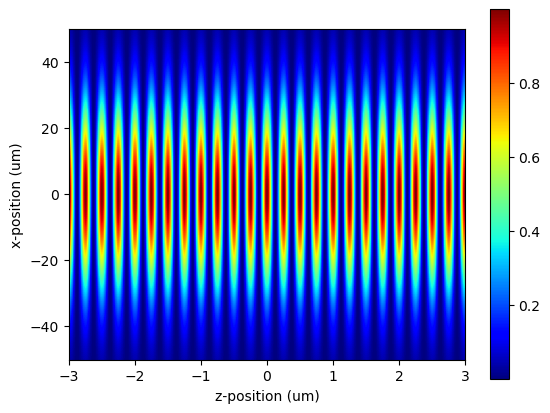

In [57]:
U = A0 * W0/W(Z) * np.exp(-rho2/W(Z)**2) * np.exp(-1j*k*Z - 1j*k*rho2/(2*R(Z)) + 1j*zeta(Z))

# calculate real value 
realU2 = np.real(U)**2

# Plot absolute value squared of U.
fig, ax = plt.subplots()
rf = ax.pcolormesh( Z*1e6, X*1e6, realU2, cmap=cm.jet )
fig.colorbar(rf)
plt.xlabel('z-position (um)')
plt.ylabel('x-position (um)')
ax.set_aspect(0.05)